### Import the Required Libraries

In [138]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Import and Read Data

In [113]:
# import and read data
pcos_data = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name='Full_new')
pcos_data.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


### Drop all Unimportant Columns

In [114]:
# drop all unimportant columns
pcos_data.drop(columns=['Sl. No', 'Patient File No.', 'Unnamed: 44'], inplace= True)

In [115]:
# check data information
pcos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PCOS (Y/N)             541 non-null    int64  
 1    Age (yrs)             541 non-null    int64  
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    242 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Pulse rate(bpm)        541 non-null    int64  
 7   RR (breaths/min)       541 non-null    int64  
 8   Hb(g/dl)               541 non-null    float64
 9   Cycle(R/I)             541 non-null    int64  
 10  Cycle length(days)     541 non-null    int64  
 11  Marraige Status (Yrs)  540 non-null    float64
 12  Pregnant(Y/N)          541 non-null    int64  
 13  No. of abortions       541 non-null    int64  
 14    I beta-HCG(mIU/mL)   541 non-null    float64
 15  II bet

## KNOWING OUR DATASET
|COLUMNS|DESCRIPTION|
|-----|-----|
|PCOS(Y/N)|Polycystic Ovary Syndrome (PCOS), a very common hormone problem for women of Childbearing age. This is to know whether the patient has this syndrome or not|
|Age(yrs)|Age of the patient|
|Weight(Kg)|Weight of patient in kilograms|
|Height(cm)|Height of patient in centimeters|
|BMI|Body mass Index of patient. It is usually calculated by dividing weight of person in kilogramns by the square of their height in meters|
|Blood Group|Blood group of the patient. There are 8 groups in the dataset. 11 = A+, 12 = A-, 13 = B+, 14 = B-, 15 = O+, 16 = O-,  17 = AB+,18 = AB-|
|Pulse rate(bpm)|Number of times the heart beats per minute|
|RR(breaths/min|Number of breaths taken per minute|
|Hb(g/dl)|Amount of protein contained in red blood cells. Expressed in grams per deciliter. Normal range for women: 12.1 - 15.1 g/dl|
|Cycle(R/I)|...|
|Cycle length(days)|Number of days between periods, counting the first day of period until the day before the next period starts|
|Marraige Status(Yrs)|Number of years spent in marraige, if married|
|Pregnant(Y/N)|Is the patient pregnant or not?|
|Number of abortions|Number of abortions already done by patient|
|I beta-HCG(mIU/mL)|Case 1, Blood test used to measure HCG levels in early pregnancy. Results of less than 5 mIU/mL of HCG are negative|
|II beta-HCG(mIU/mL)|Case 2, Blood test used to measure HCG levels in early pregnancy|
|FSH(mIU/mL)|Follicle Stimulating Hormone. Before puberty: 0 to 5.0 mIU/mL (0 to 5.0 IU/L) During puberty: 0.3 to 10.0 mIU/mL (0.3 to 10.0 IU/L) Adult: 1.5 to 12.4 mIU/mL (1.5 to 12.4 IU/L)|
|LH(mIU/mL)|Luteinizing Hormone, For Women, in follicular phase of menstrual cycle: 1.68 to 15 IU/mL. Women, midcycle peak: 21.9 to 56.6 IU/mL|
|FSH/LH|Ratio of FSH to LH|
|Hip(inch)|Size of hips in inches|
|Waist(inch)|Size of Waist in iches|
|Waist:Hip ratio|Ratio of Waist to Hip|
|TSH (mIU/L)|Ihyroid stimulating hormone. Normal values are from 0.4 to 4.0 mIU/L|
|AMH(ng/mL)|Anti-Mullerian Hormone|
|PRL(ng/mL)|Prolactin level. Normal levels for Nonpregnant women: less than 25 ng/mL, Pregnant women: 80 to 400 ng/mL|
|Vit D3 (ng/mL)|25-hydroxy Vitamin D level. Normal range is usually between 20-40 ng/mL|
|PRG(ng/mL)|Progesterone level|
|RBS(mg/dl)|Random Blood Sugar Test. Blood Sugar of less than 140 mg/dl is considered normal|
|Weight gain(Y/N)|Did the patient gain weight?|
|hair growth(Y/N)|Is there an hair growth?|
|Skin darkening (Y/N)|Does the patient have any skin darkening issue?|
|Hair loss(Y/N)|Has the patient been losing hair?|
|Pimples(Y/N)|Does the patient have pimples?|
|Fast food (Y/N)|Is fast food part of the patients' diet?|
|Reg.Exercise(Y/N)|Does the patient exercise on a regular basis?|
|BP _Systolic (mmHg)|Systolic blood pressure, measures the pressure in the arteries when the heart beats. A value of below 140 mmHg is considered to be normal|
|BP _Diastolic (mmHg)|Diastolic blood pressure, measures the pressure in the arteries when the heart rests between beats. A value of less than 90 mmHg is considered to be normal|
|Follicle No. (L)|Number of antral follicles in the left ovary. A woman has a normal ovarian reserve if follicle count is 6 - 10|
|Follicle No. (R)|Number of antral follicles in the right ovary. A woman has a normal ovarian reserve if follicle count is 6 - 10|
|Avg. F size (L) (mm)|Average follicle size in the left ovary. Expressed in millimeters|
|Avg. F size (R) (mm)|Average follicle size in the right ovary. Expressed in millimeters|
|Endometrium (mm)|Layer of tissue that lines the uterus. Expressed in millimeters|

### Check for Null values

In [116]:
# check for null values
pcos_data.isnull().sum()

PCOS (Y/N)                 0
 Age (yrs)                 0
Weight (Kg)                0
Height(Cm)                 0
BMI                      299
Blood Group                0
Pulse rate(bpm)            0
RR (breaths/min)           0
Hb(g/dl)                   0
Cycle(R/I)                 0
Cycle length(days)         0
Marraige Status (Yrs)      1
Pregnant(Y/N)              0
No. of abortions           0
  I beta-HCG(mIU/mL)       0
II beta-HCG(mIU/mL)        0
FSH(mIU/mL)                0
LH(mIU/mL)                 0
FSH/LH                     0
Hip(inch)                  0
Waist(inch)                0
Waist:Hip Ratio            0
TSH (mIU/L)                0
AMH(ng/mL)                 1
PRL(ng/mL)                 0
Vit D3 (ng/mL)             0
PRG(ng/mL)                 0
RBS(mg/dl)                 0
Weight gain(Y/N)           0
hair growth(Y/N)           0
Skin darkening (Y/N)       0
Hair loss(Y/N)             0
Pimples(Y/N)               0
Fast food (Y/N)            1
Reg.Exercise(Y

### Check for Duplicates

In [117]:
# check for duplicates

pcos_data.duplicated().sum()

0

### Strip all columns of all leading and trailing whitespaces

In [118]:
pcos_data = pcos_data.rename(columns=lambda x: x.strip())
pcos_data = pcos_data.rename(columns=lambda x: x.strip('.'))

In [119]:
pcos_data["II beta-HCG(mIU/mL)"] = pd.to_numeric(pcos_data["II beta-HCG(mIU/mL)"])

### Some columns are categorical and seem encoded. View all categorical columns and their dummy variables

In [120]:
# check the number of unique values in each column
pcos_data.nunique()

PCOS (Y/N)                 2
Age (yrs)                 29
Weight (Kg)              117
Height(Cm)                50
BMI                      107
Blood Group                8
Pulse rate(bpm)           11
RR (breaths/min)           8
Hb(g/dl)                  46
Cycle(R/I)                 3
Cycle length(days)        12
Marraige Status (Yrs)     34
Pregnant(Y/N)              2
No. of abortions           6
I beta-HCG(mIU/mL)       307
II beta-HCG(mIU/mL)      202
FSH(mIU/mL)              371
LH(mIU/mL)               342
FSH/LH                   515
Hip(inch)                 19
Waist(inch)               23
Waist:Hip Ratio           92
TSH (mIU/L)              308
AMH(ng/mL)               300
PRL(ng/mL)               481
Vit D3 (ng/mL)           331
PRG(ng/mL)                89
RBS(mg/dl)                55
Weight gain(Y/N)           2
hair growth(Y/N)           2
Skin darkening (Y/N)       2
Hair loss(Y/N)             2
Pimples(Y/N)               2
Fast food (Y/N)            2
Reg.Exercise(Y

In [121]:
# All categorical columns have less than 9 unique values but some numeric columns also do
# Print all categorical values excluding all numeric columns with less than 9 unique values

cat_cols = []
num_cols = []
for col in pcos_data.columns:
    if pcos_data[col].nunique() <= 9 and col not in ['RR (breaths/min)', 'No. of abortions', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)']:
            cat_cols.append(col)
    else:
        num_cols.append(col)

print("Categorical variables are: ", cat_cols)
print("Numerical variables are: ", num_cols)

Categorical variables are:  ['PCOS (Y/N)', 'Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']
Numerical variables are:  ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'No. of abortions', 'I beta-HCG(mIU/mL)', 'II beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)']


In [122]:
# view dummy variables of encoded columns

print('PCOS (Y/N): ', pcos_data['PCOS (Y/N)'].unique())
print('Blood Group: ', pcos_data['Blood Group'].unique())
print('Cycle(R/I): ', pcos_data['Cycle(R/I)'].unique())
print('Pregnant(Y/N): ', pcos_data['Pregnant(Y/N)'].unique())
print('Weight gain(Y/N): ', pcos_data['Weight gain(Y/N)'].unique())
print('hair growth(Y/N): ', pcos_data['hair growth(Y/N)'].unique())
print('Skin darkening (Y/N): ', pcos_data['Skin darkening (Y/N)'].unique())
print('Hair loss(Y/N): ', pcos_data['Hair loss(Y/N)'].unique())
print('Pimples(Y/N): ', pcos_data['Pimples(Y/N)'].unique())
print('Fast food (Y/N): ', pcos_data['Fast food (Y/N)'].unique())
print('Reg.Exercise(Y/N): ', pcos_data['Reg.Exercise(Y/N)'].unique())

PCOS (Y/N):  [0 1]
Blood Group:  [15 11 13 17 16 12 14 18]
Cycle(R/I):  [2 4 5]
Pregnant(Y/N):  [0 1]
Weight gain(Y/N):  [0 1]
hair growth(Y/N):  [0 1]
Skin darkening (Y/N):  [0 1]
Hair loss(Y/N):  [0 1]
Pimples(Y/N):  [0 1]
Fast food (Y/N):  [ 1.  0. nan]
Reg.Exercise(Y/N):  [0 1]


In [123]:
pcos_data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.3,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,NaN,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,NaN,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,NaN,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,NaN,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


### Use provided weight and height to calculate missing BMI data

In [124]:
pcos_data['BMI'] = round(pcos_data['Weight (Kg)'] / ((pcos_data['Height(Cm)'] / 100) ** 2), 1)


### Drop all other null values in the data aa they are minute and filling with mean or median will not make make sense

In [125]:
pcos_data = pcos_data.dropna()

# DATA VISUALIZATION

### How do the different features correlate to PCOS

<AxesSubplot: >

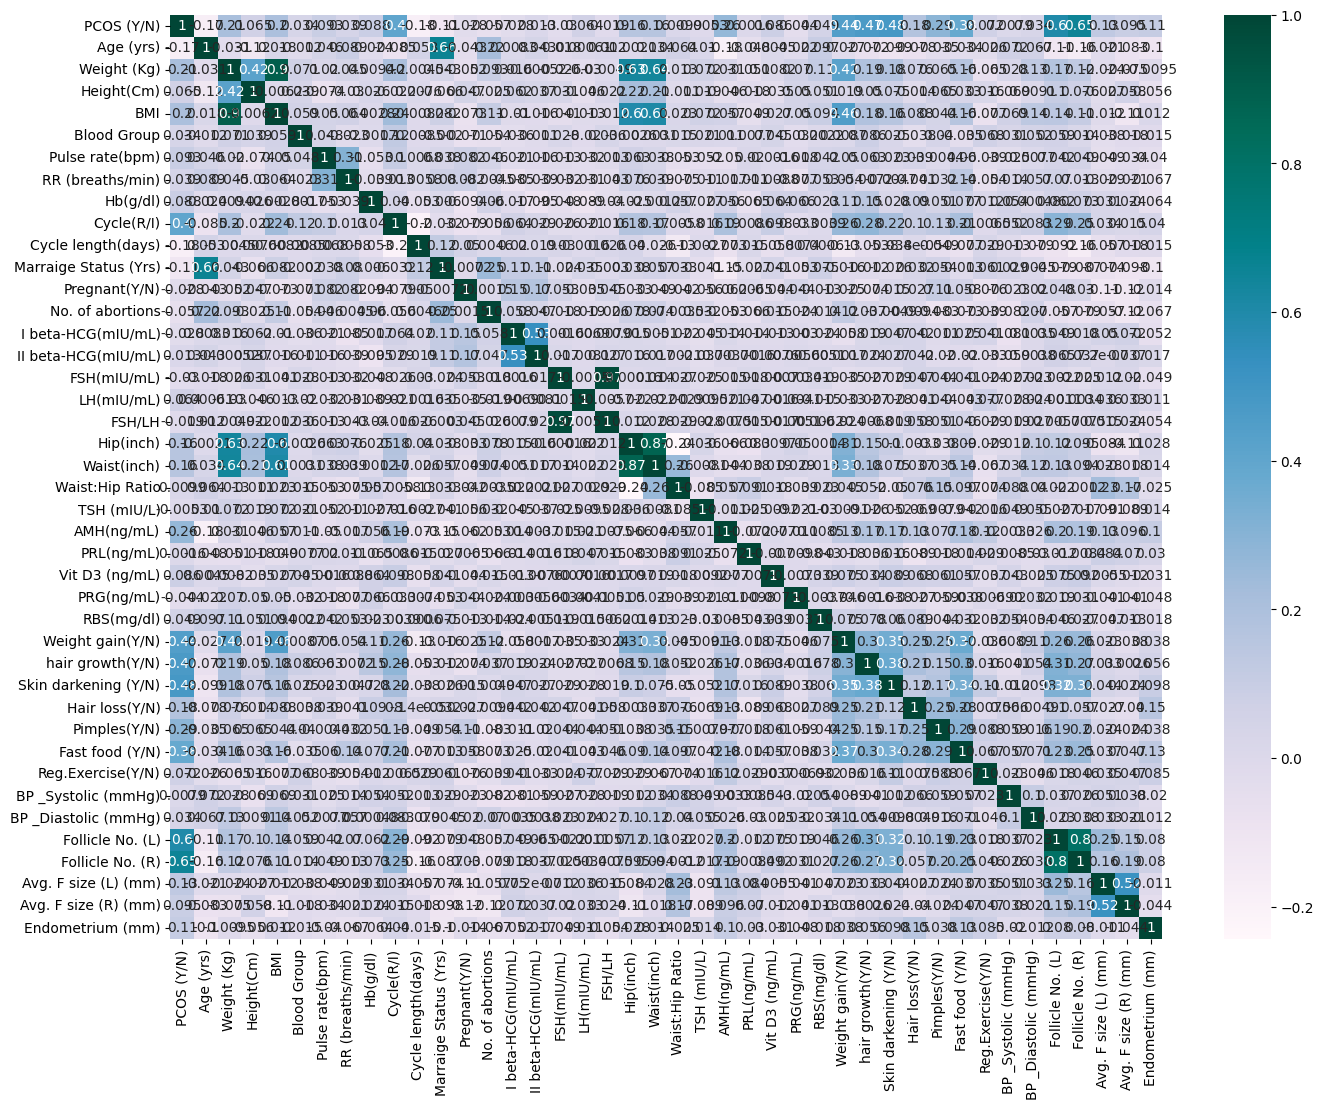

In [126]:
plt.figure(figsize=(16,12))

sns.heatmap(pcos_data.corr(), cmap='PuBuGn', annot=True)

### How many of the patients in the dataset have the PCOS?

<AxesSubplot: xlabel='PCOS (Y/N)', ylabel='count'>

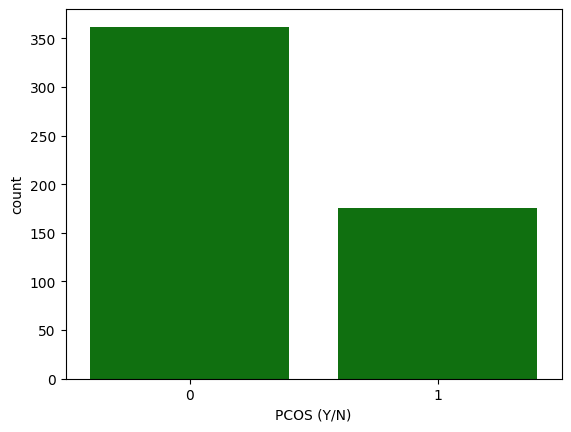

In [127]:
sns.countplot(data=pcos_data, x= 'PCOS (Y/N)', color= 'green')

In [128]:
pcos_data['PCOS (Y/N)'].value_counts()

0    362
1    176
Name: PCOS (Y/N), dtype: int64

In [129]:
# calculating the percentage of people with and without PCOS
total_patients = pcos_data['PCOS (Y/N)'].value_counts().sum()
((pcos_data['PCOS (Y/N)'].value_counts()) / total_patients) * 100

0    67.286245
1    32.713755
Name: PCOS (Y/N), dtype: float64

**The above shows that 364 patients making 67.3% of the total population in our dataset do not PCOS and 177 patients, i.e. 32.8% of the total population has PCOS**

### Show Distribution of Patients in the Dataset 

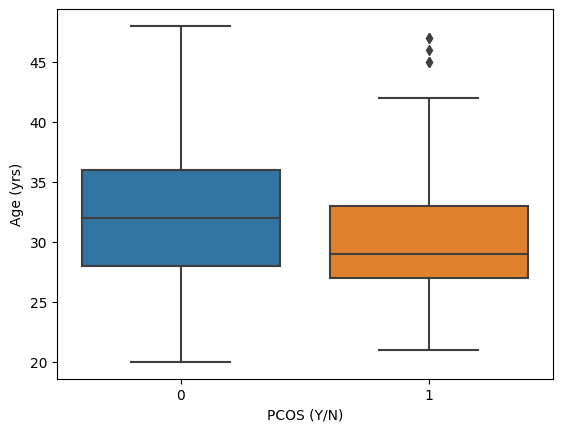

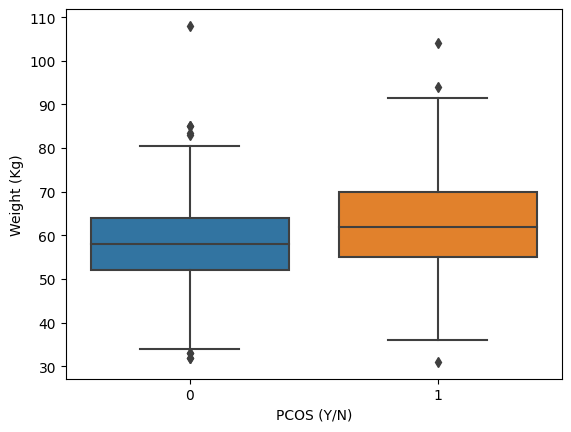

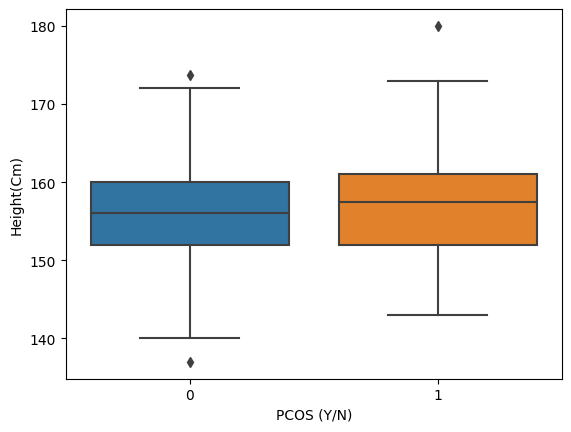

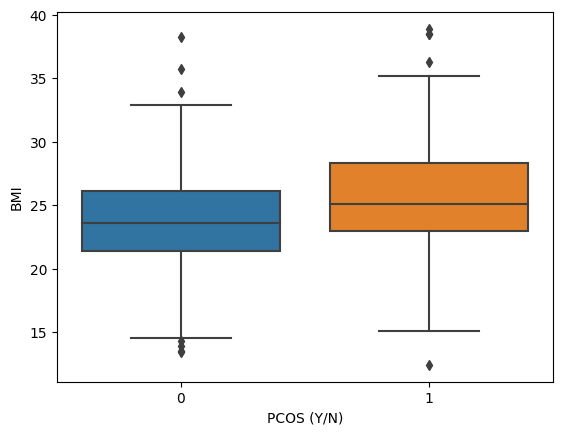

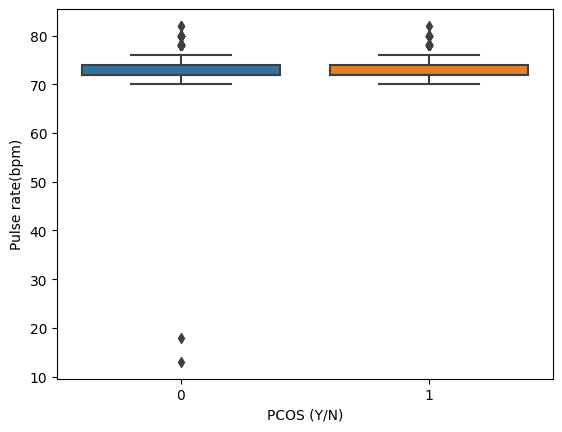

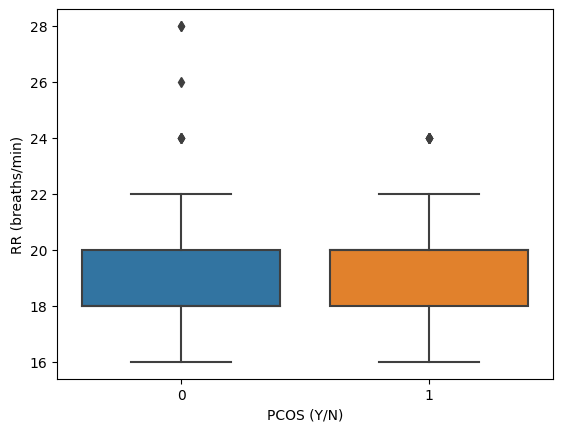

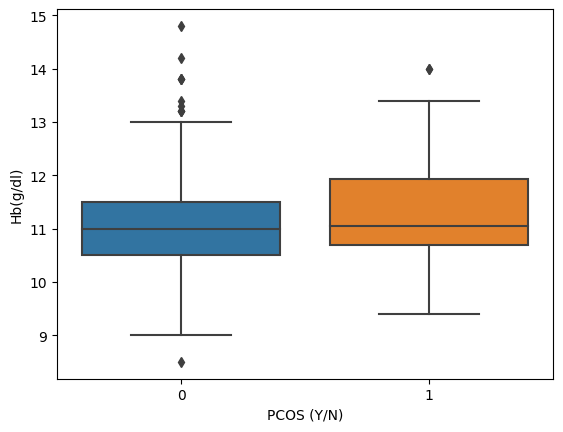

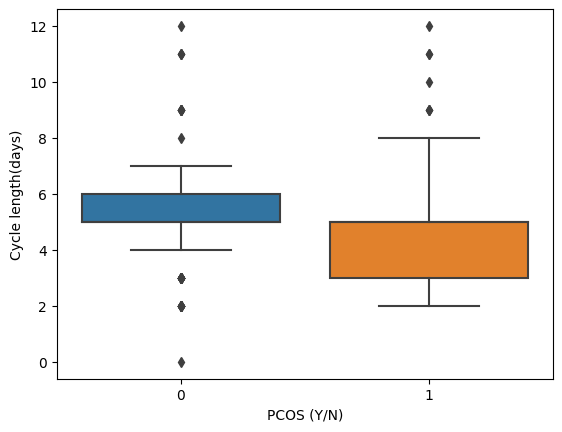

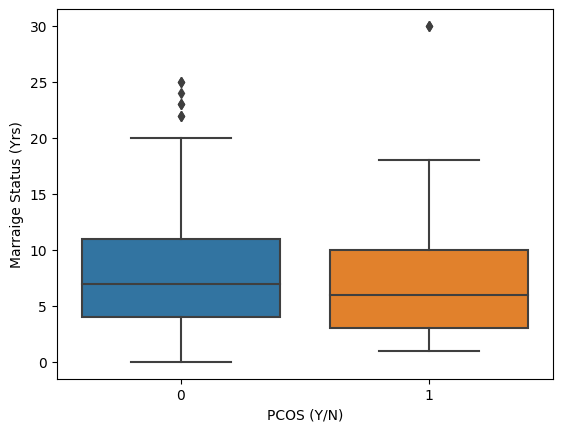

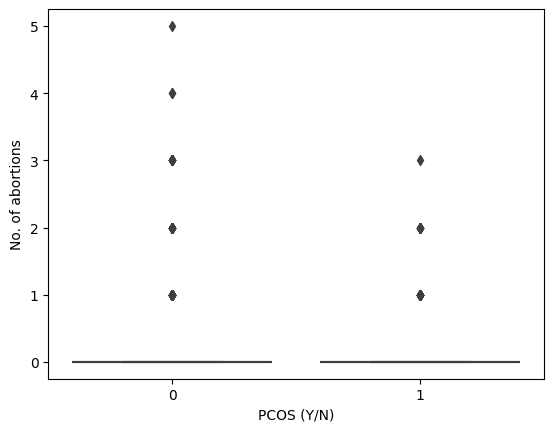

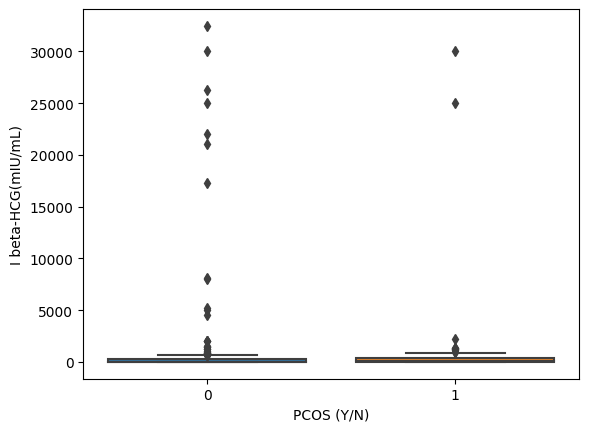

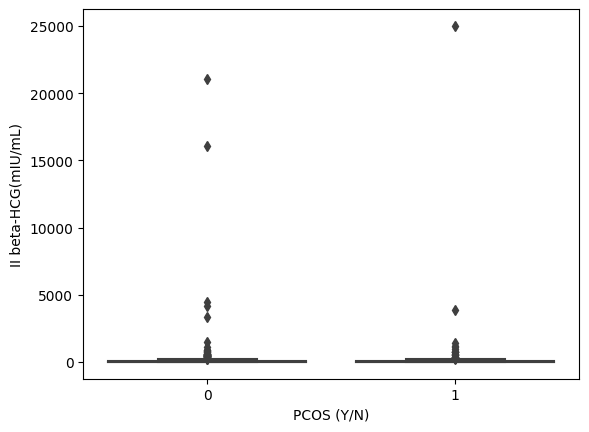

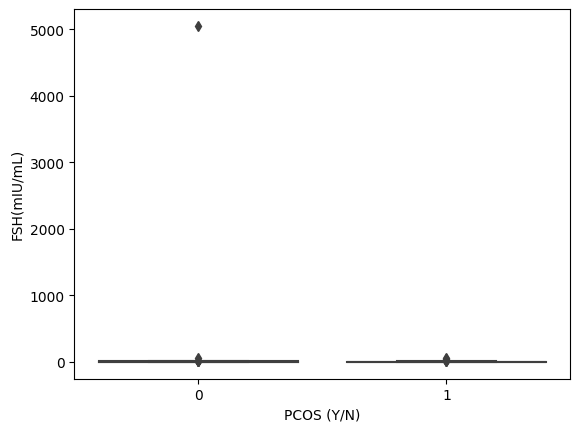

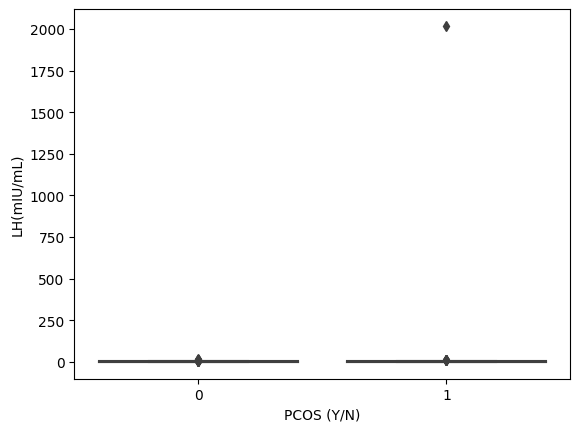

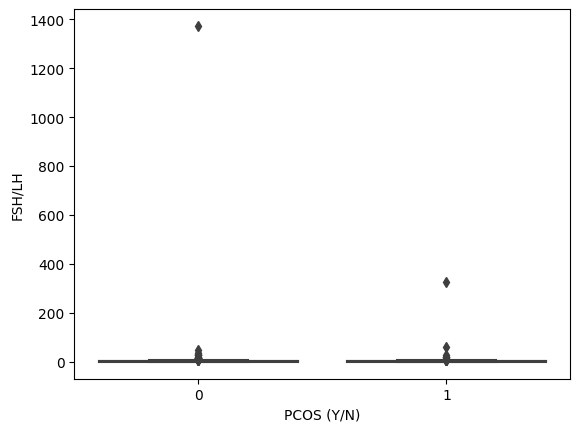

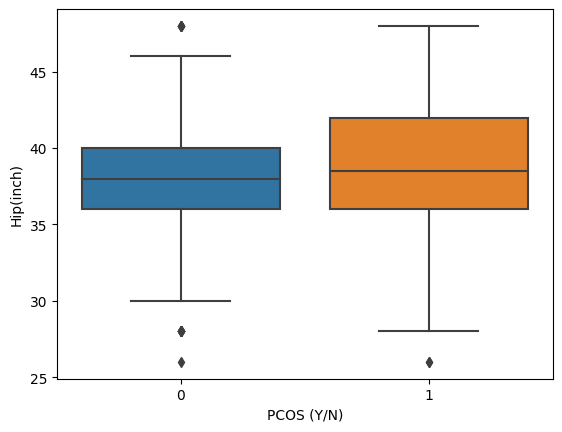

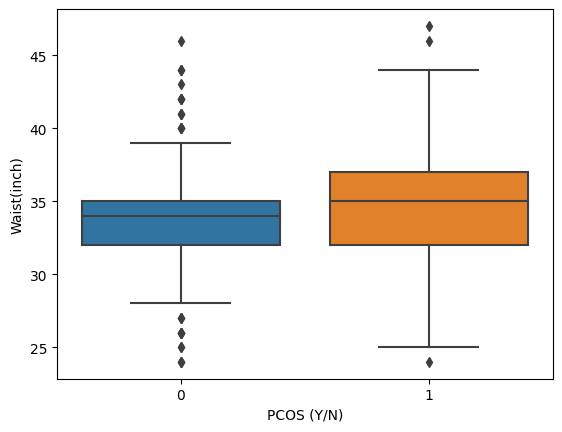

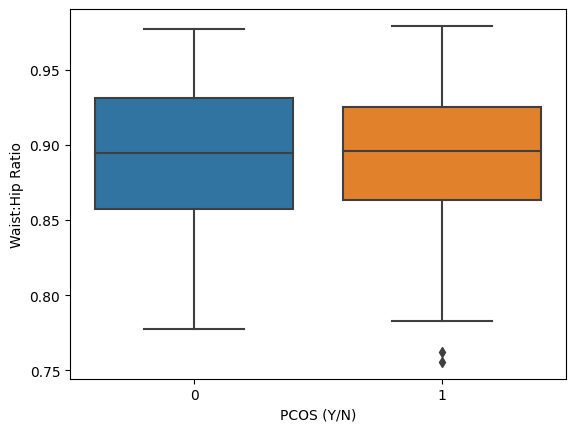

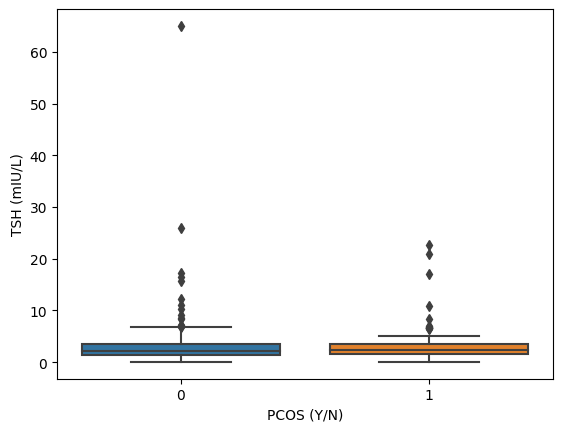

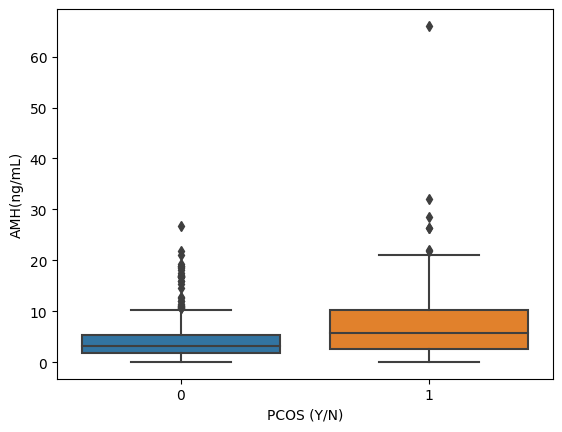

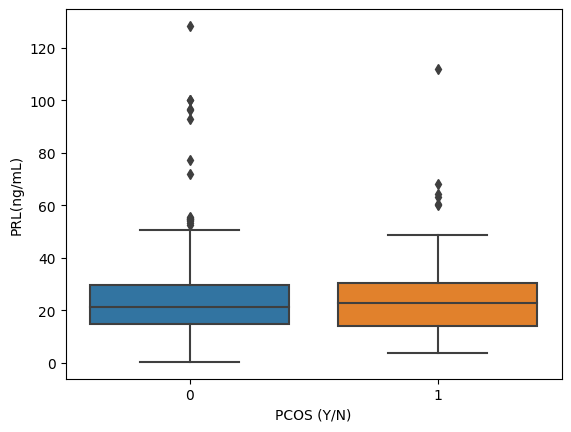

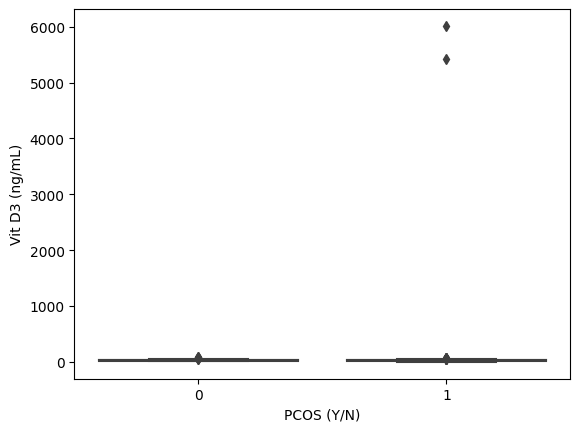

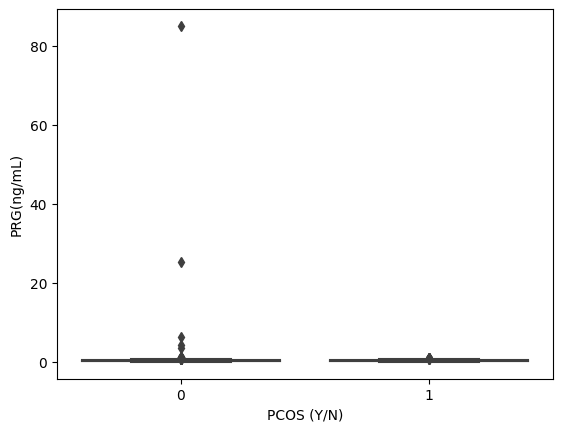

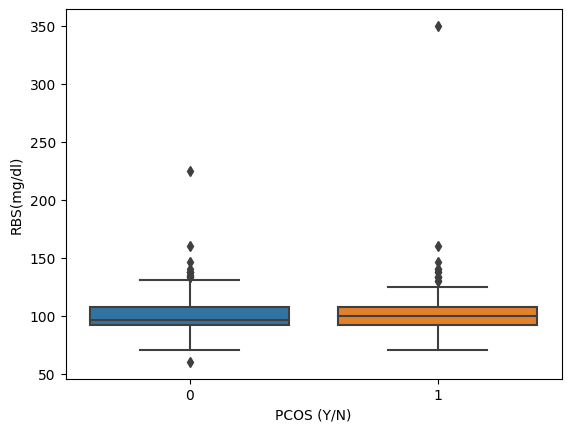

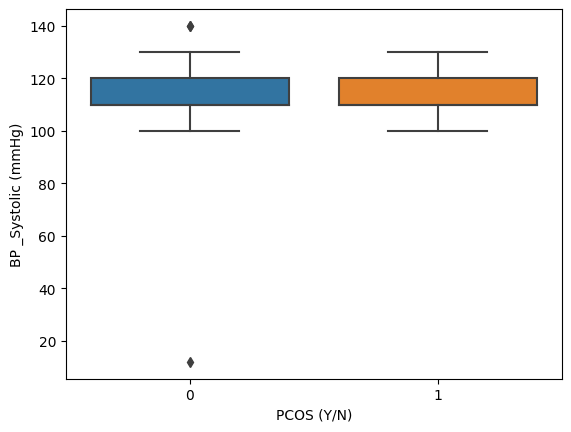

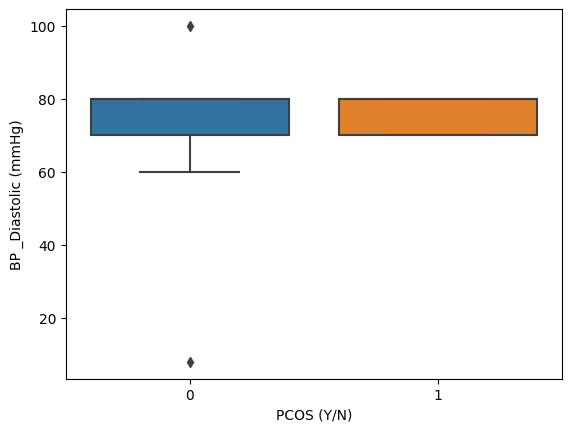

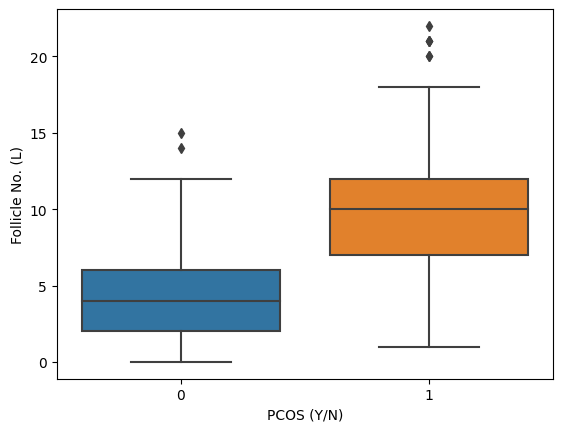

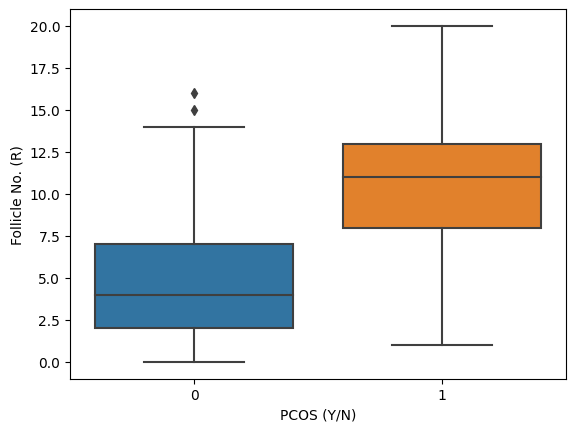

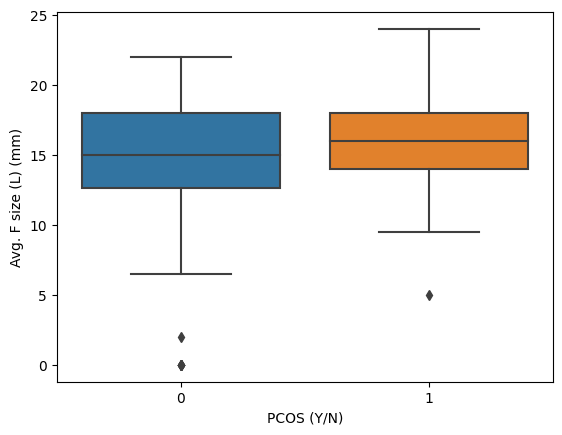

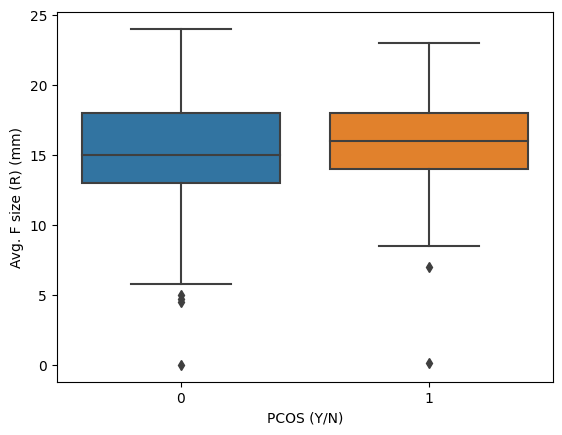

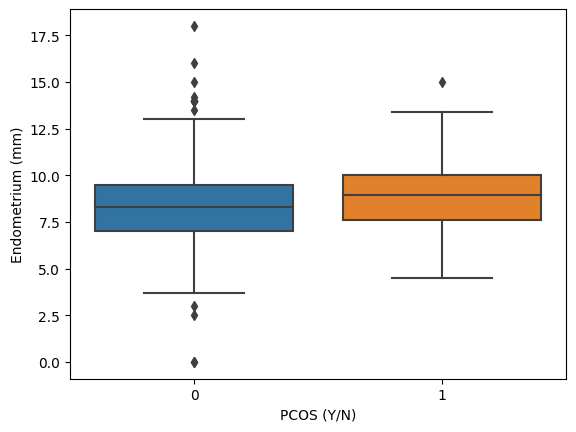

In [130]:
for item in num_cols:
    sns.boxplot(y=item, x='PCOS (Y/N)', data=pcos_data)
    plt.show()

**Observations from Boxplot**

**Patients with PCOS have high numbers of follicles in their two ovaries.**
**Most of the patients with PCOS have lower menstrual cycle length.** 

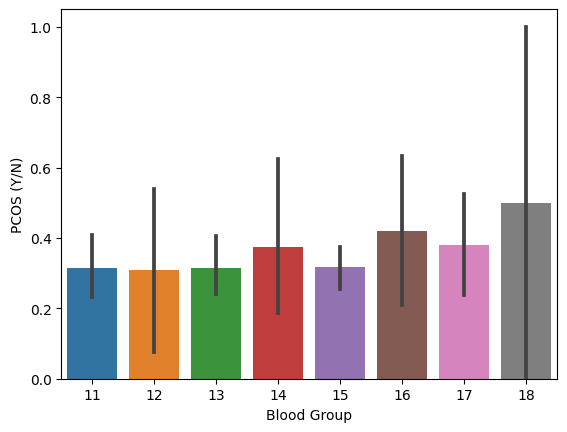

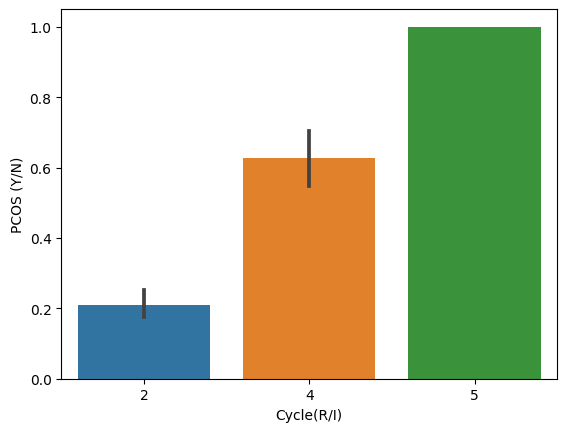

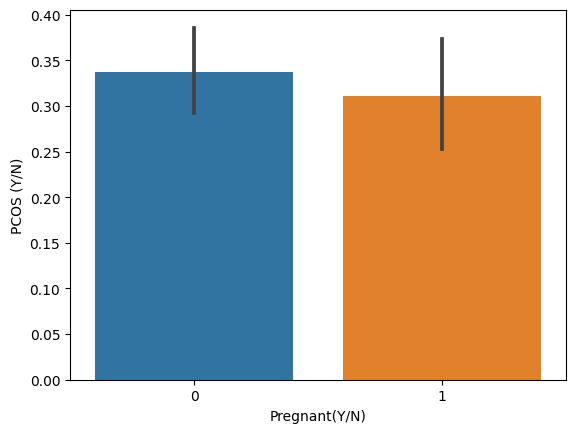

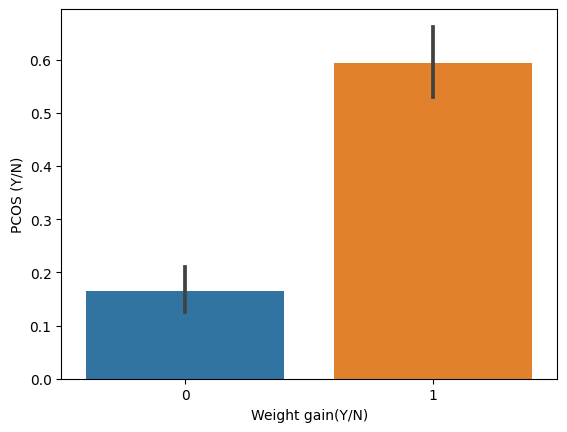

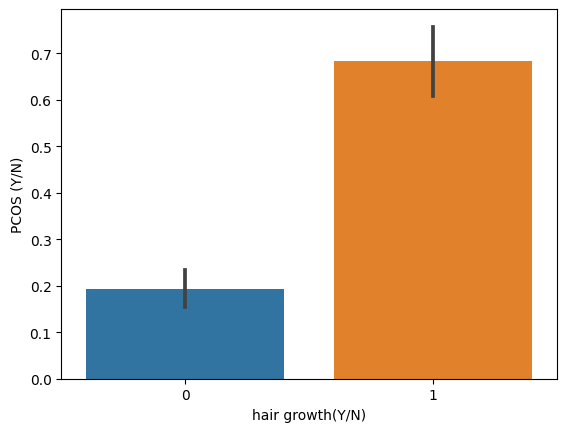

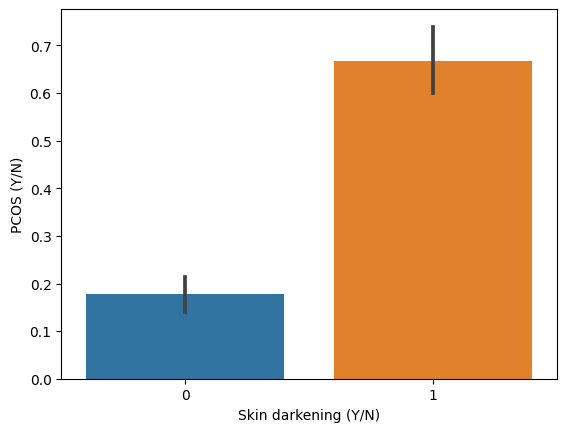

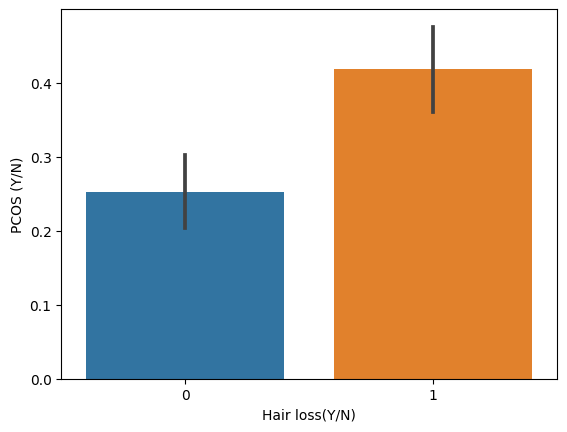

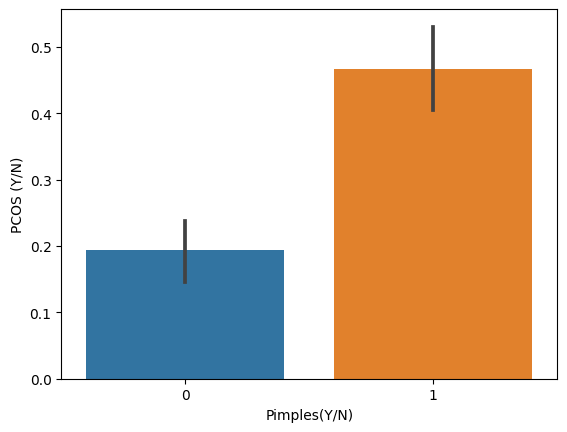

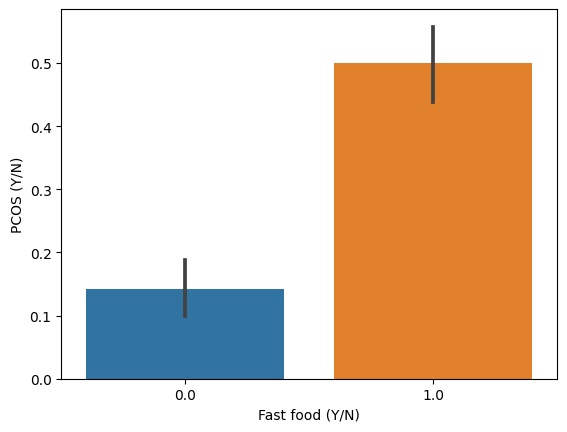

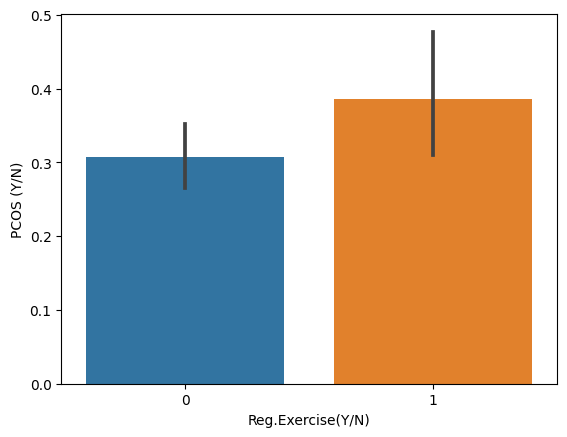

In [131]:
for x in cat_cols:
    if x != "PCOS (Y/N)":
        sns.barplot(x= x, y = "PCOS (Y/N)", data = pcos_data)
        plt.show()

**Observations from Barplots**
**Most Patients with PCOS experienced, weight gain, hair growth, pimples, hair loss, skin darkening and include fast foods in their diet**

# CLASSIFICATION WITH A LOGISTIC REGRESSION MODEL

In [132]:
model = LogisticRegression()

### Define target variable, y and features, x

In [133]:
x = pcos_data.drop(columns=['PCOS (Y/N)'])
y = pcos_data['PCOS (Y/N)']

### Split Dataset with test size as 30%

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Train Model

In [135]:
model.fit(X_train, y_train)

c:\Users\Vincent Oloyede\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Check model accuracy score

In [147]:
round(model.score(X_test, y_test), 2)

0.83

**Accuracy Score of the model is 0.83**

### Build a Confusion matrix to see how the model did

In [140]:
y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[96, 10],
       [17, 39]], dtype=int64)

Text(70.72222222222221, 0.5, 'Truth')

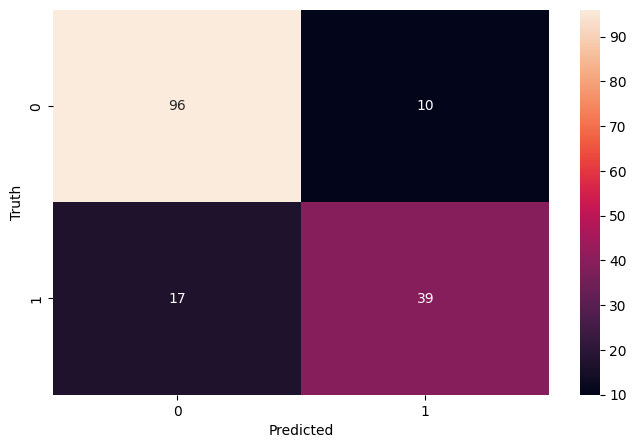

In [145]:
plt.figure(figsize= (8,5))
sns.heatmap(cm, annot= True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

**96 times, the patient did not have PCOS and the model predicted it to be true but 10 times, the patient did not have PCOS and the model predicted it wrong**

**17 times, the patient had PCOS, but the model predicted it wrong and 39 times, the patients had PCOS, and the model predicted it right**